In [37]:
from sympy import *
import numpy as np
from matplotlib import pyplot

In [23]:
N = Symbol('N', positive=True, odd=True)
n = Symbol('n', positive=True, odd=True)
phi = Symbol('phi', real=True)
nu = Symbol('nu', real=True)
A = Symbol('A', real=True)

In [14]:
lambda_nu = (1+nu)/(1-nu) *((1-nu**2)/A**2/nu**2)**nu
lambda_nu

((1 - nu**2)/(A**2*nu**2))**nu*(nu + 1)/(1 - nu)

In [47]:
def make_potential(A_num, N_num, s_num=1):
    lambda_pre = lambda_nu.subs(nu,n/N_num).subs(A,A_num).simplify()
    lambda_n = lambdify(n, lambda_pre, 'numpy')

    exponent = N_num/2
    V_num = Integer(0)
    for n_num in range(1, N_num, 2):
        lambda_num = lambda_n(n_num)
        sig = (-1)**((n_num-1)/2)
        V_num = V_num + sig * lambda_num**exponent / (n_num+1)**s_num * phi**(n_num+1)

    display(V_num)

    return V_num

-0.0464038481863613*phi**40 + 1.28366097812316*phi**38 - 19.4892938353572*phi**36 + 194.159248961554*phi**34 - 1377.24924385922*phi**32 + 7277.4206032217*phi**30 - 29426.8246404693*phi**28 + 92532.8359178887*phi**26 - 228261.614798333*phi**24 + 443118.30380535*phi**22 - 675828.801313769*phi**20 + 804753.848688348*phi**18 - 739844.497562444*phi**16 + 516293.524318682*phi**14 - 266893.506747863*phi**12 + 98718.3548859598*phi**10 - 24846.3663745264*phi**8 + 3943.36964523496*phi**6 - 347.7689579553*phi**4 + 12.9969750501604*phi**2

(-0.2, 2.2)

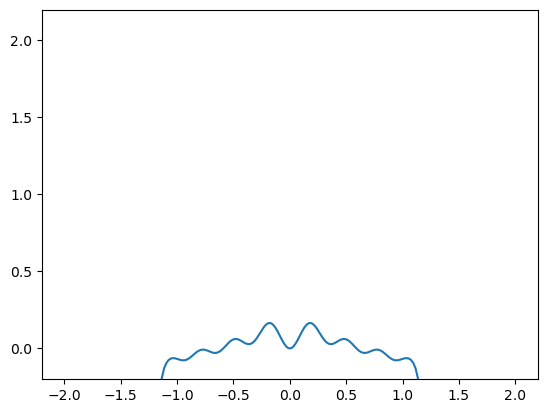

In [48]:
A_num = 2
N_num = 41
s_num = 2.1

phi_num = np.linspace(-A_num, A_num, 200)
V_num = lambdify(phi, make_potential(A_num, N_num, s_num), 'numpy')

pyplot.plot(phi_num, V_num(phi_num))
pyplot.ylim(-0.1*A_num, 1.1*A_num)
